In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

Breast Cancer data information:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [2]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [3]:
X = bc.data
z = bc.target
X.shape

(569, 30)

In [25]:
n,p = bc.data.shape
set_seed = 100

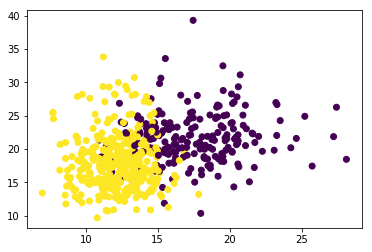

In [26]:
plt.scatter(X[:, 0], X[:,1], c=z)
pass

In [27]:
tsne = TSNE(random_state=set_seed, perplexity=50)
#set seed for the initial low dimensional points

In [28]:
y = tsne.fit_transform(X)

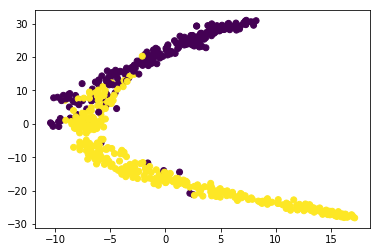

In [29]:
plt.scatter(y[:, 0], y[:, 1], c=z)
pass

In [9]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z)

# 1. Neural Network

In [11]:
from keras.models import Sequential
from keras.layers import Dense

/Users/jasmine/envs/env-py3-cgcnn/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
model = Sequential()
model.add(Dense(64, input_shape=(p,), activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(2))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [14]:
loss = history.history['loss']

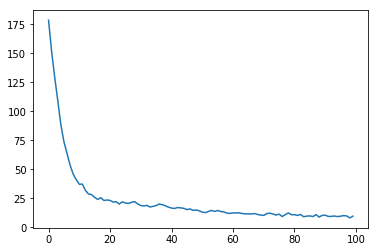

In [15]:
plt.plot(loss)
pass

In [16]:
yhat = model.predict(X_test)

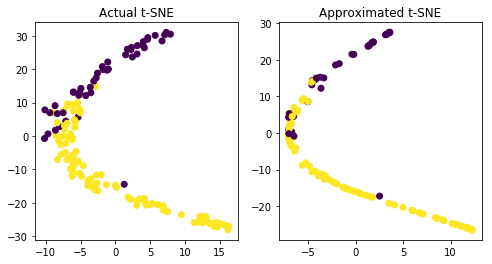

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(y_test[:, 0], y_test[:, 1], c=z_test)
plt.title('Actual t-SNE')
plt.subplot(122)
plt.scatter(yhat[:, 0], yhat[:, 1], c=z_test)
plt.title('Approximated t-SNE')
pass

# 2. Linear Models

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

/Users/jasmine/envs/env-py3-cgcnn/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


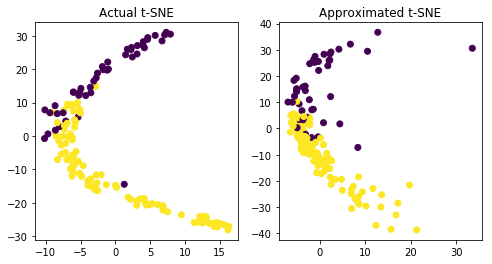

In [19]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(y_test[:, 0], y_test[:, 1], c=z_test)
plt.title('Actual t-SNE')
plt.subplot(122)
plt.scatter(y_pred[:,0], y_pred[:,1], c=z_test)
plt.title('Approximated t-SNE')
pass

# 3. Generalized Addictive Models

In [31]:
from pygam import LinearGAM

In [32]:
gam0 = LinearGAM(n_splines=10).gridsearch(X_train, y_train[:,0])
y0_gam_pred = gam0.predict(X_test)

gam1 = LinearGAM(n_splines=10).gridsearch(X_train, y_train[:,1])
y1_gam_pred = gam1.predict(X_test)


100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


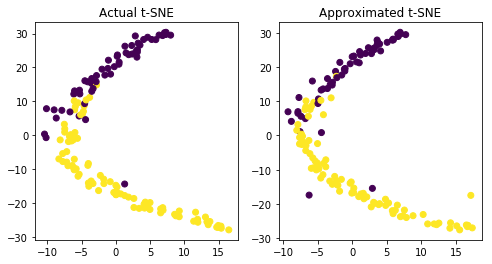

In [33]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(y_test[:, 0], y_test[:, 1], c=z_test)
plt.title('Actual t-SNE')
plt.subplot(122)
plt.scatter(y0_gam_pred, y1_gam_pred, c=z_test)
plt.title('Approximated t-SNE')
pass